In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from pylab import rcParams
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_curve, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


In [4]:
df_train = pd.read_csv(r"C:\Users\HAMMAD\Desktop\ids\labels.csv", delimiter=',',
                       names=['image_no','text_ocr','text_corrected','overall_sentiment'])

df_train.drop(index = df_train.index[0], axis=0, inplace=True)
df_train['overall_sentiment'] = df_train['overall_sentiment'].replace({'very_positive': 'positive', 'very_negative': 'negative'})
df=df_train[:500]
testdata=pd.DataFrame(df_train[500:1000])
testdata.columns=['image_no','text_ocr','text_corrected','overall_sentiment']
testdata.head()

,image_no,text_ocr,text_corrected,overall_sentiment
500.0,image_501.jpg,Sheldon Cooper (Big Bang Theory) The only thin...,Sheldon Cooper [Big Bang Theory] The only thin...,positive
501.0,image_502.jpg,You called the police because someone hacked y...,You called the police because someone hacked y...,neutral
502.0,image_503.jpg,ONE CRIES BECAUSE ONE IS SAD. FOR EXAMPLE,ONE CRIES BECAUSE ONE IS SAD. FOR EXAMPLE I C...,neutral
503.0,image_504.png,SOFT DEAN WARM DEAN DADDY'S LITTLE SON HAPPY D...,SOFT DEAN WARM DEAN DADDY'S LITTLE SON HAPPY D...,positive
504.0,image_505.png,That moment when you still don't know her last...,That moment when you still don't know her last...,positive


C:\Users\HAMMAD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='overall_sentiment', ylabel='count'>

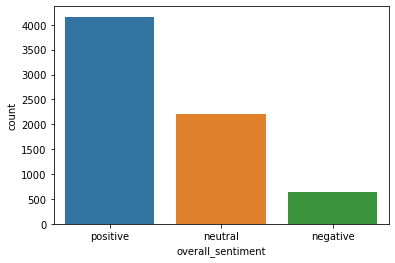

In [5]:
sns.countplot(df_train.overall_sentiment)

In [6]:
df['overall_sentiment'].value_counts()

positive    304
neutral     157
negative     40
Name: overall_sentiment, dtype: int64

In [7]:
df.isnull().count()

image_no             501
text_ocr             501
text_corrected       501
overall_sentiment    501
dtype: int64

In [9]:
df.isnull().sum()

image_no             0
text_ocr             6
text_corrected       1
overall_sentiment    0
dtype: int64

In [10]:

df.reset_index(inplace=True,drop=True)
print(df)

          image_no                                           text_ocr  \
0      image_1.jpg  LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...   
1     image_2.jpeg  The best of #10 YearChallenge! Completed in le...   
2      image_3.JPG  Sam Thorne @Strippin ( Follow Follow Saw every...   
3      image_4.png              10 Year Challenge - Sweet Dee Edition   
4      image_5.png  10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...   
..             ...                                                ...   
496  image_497.jpg  Meets Justin Bieber Can't talk to him No glass...   
497  image_498.jpg  CLAIMS TO BE NERDY Norton 3 USES NORTON SECURI...   
498  image_499.png  Self Proclaimed Nerd NED Learns everything fro...   
499  image_500.png  SHELDON: BAZINGA BIG BANG THEORY STUDIO AUDIEN...   
500  image_501.jpg  Sheldon Cooper (Big Bang Theory) The only thin...   

                                        text_corrected overall_sentiment  
0    LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHA

In [11]:
df['overall_sentiment'].value_counts()

positive    304
neutral     157
negative     40
Name: overall_sentiment, dtype: int64

C:\Users\HAMMAD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='overall_sentiment', ylabel='count'>

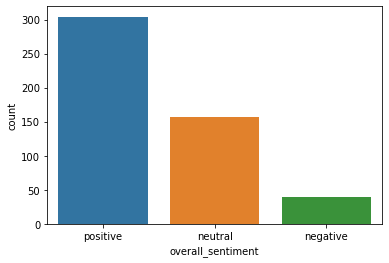

In [12]:
sns.countplot(df.overall_sentiment)

In [13]:
classes = df_train['overall_sentiment'].unique()

#making seperate classes of each sentiment
positive = df_train[df_train.overall_sentiment==classes[0]]
neutral = df_train[df_train.overall_sentiment==classes[1]]
negative = df_train[df_train.overall_sentiment==classes[2]]

#count of positive is most so we UPSAMPLE other labels to balance the CLASS LABEL
neutral_increased = resample(neutral,
                          replace=True,
                          n_samples=len(positive), 
                          random_state=27)
negative_increased = resample(negative,
                          replace=True,
                          n_samples=len(positive), 
                          random_state=27)

C:\Users\HAMMAD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='overall_sentiment', ylabel='count'>

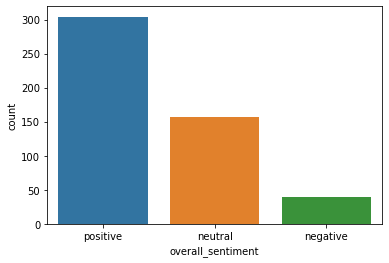

In [14]:
sns.countplot(df.overall_sentiment)

In [15]:
def custom_encoder(df):
    df.replace(to_replace ="positive", value =1, inplace=True)
    df.replace(to_replace ="neutral", value =0, inplace=True)
    df.replace(to_replace ="negative", value =-1, inplace=True)


In [16]:
custom_encoder(df.overall_sentiment)

C:\Users\HAMMAD\AppData\Local\Temp\ipykernel_18324\2074293035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(to_replace ="positive", value =1, inplace=True)
C:\Users\HAMMAD\AppData\Local\Temp\ipykernel_18324\2074293035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(to_replace ="neutral", value =0, inplace=True)
C:\Users\HAMMAD\AppData\Local\Temp\ipykernel_18324\2074293035.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

C:\Users\HAMMAD\AppData\Local\Temp\ipykernel_18324\2074293035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(to_replace ="positive", value =1, inplace=True)
C:\Users\HAMMAD\AppData\Local\Temp\ipykernel_18324\2074293035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(to_replace ="neutral", value =0, inplace=True)
C:\Users\HAMMAD\AppData\Local\Temp\ipykernel_18324\2074293035.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

<AxesSubplot:xlabel='overall_sentiment', ylabel='count'>

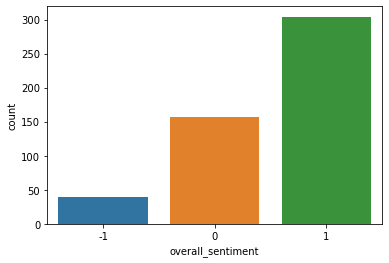

In [17]:
custom_encoder(df['overall_sentiment'])
sns.countplot(df.overall_sentiment)

In [18]:
#object of WordNetLemmatizer
lm = WordNetLemmatizer()
def clean_text(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [19]:
corpus = clean_text(df['text_ocr'])

In [20]:
dd = ' '.join(str(v) for v in df['text_ocr'])
word_cloud = WordCloud(width=800, height=800, background_color='red', max_words=200).\
generate(dd)

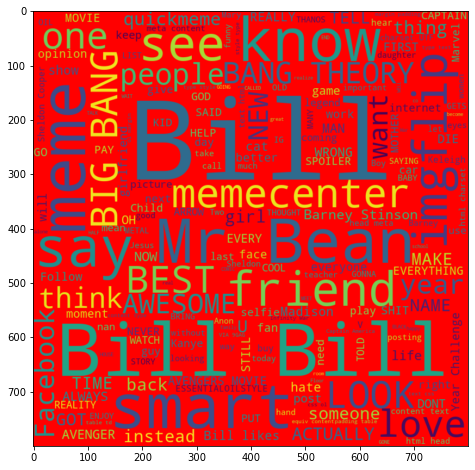

In [21]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud, interpolation='bilinear')
plt.show()

In [22]:
#Using CountVectorizer to Extracting Features from Text
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X = traindata
y = df.overall_sentiment

In [23]:
parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [500, 1000, 1500],
             'max_depth': [2, 5, None],
             'min_samples_split': [5, 10, 15],
             'min_samples_leaf': [1, 2, 5, 10],
             'bootstrap': [True, False]
             }


In [26]:
# grid search is a technique for finding the optimal parameter values from a given set of parameters in a grid
grid_search = GridSearchCV(RandomForestClassifier(), parameters, cv=2, return_train_score=True, n_jobs=-1)

#tries all the combinations of the values passed in the dictionary
#and evaluates the model for each combination using the Cross-Validation method.
grid_search.fit(X,y)
grid_search.best_params_
#it picks out the best hyperparamteres

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 500}

In [25]:
for i in range(432):
    print('Parameters: ',grid_search.cv_results_['params'][i])
    print('Mean Test Score: ',grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ',grid_search.cv_results_['rank_test_score'][i])

Parameters:  {'bootstrap': True, 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Mean Test Score:  0.606788844621514
Rank:  1
Parameters:  {'bootstrap': True, 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000}
Mean Test Score:  0.606788844621514
Rank:  1
Parameters:  {'bootstrap': True, 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1500}
Mean Test Score:  0.606788844621514
Rank:  1
Parameters:  {'bootstrap': True, 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}
Mean Test Score:  0.606788844621514
Rank:  1
Parameters:  {'bootstrap': True, 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1000}
Mean Test Score:  0.606788844621514
Rank:  1
Parameters:  {'bootstrap': True, 'max_depth': 2, 'max_features': 

In [27]:
#The Random forest Classifier is a supervised Machine learning algorithm used for classification using decision trees
rfc = RandomForestClassifier(max_features=grid_search.best_params_['max_features'],
                                      max_depth=grid_search.best_params_['max_depth'],
                                      n_estimators=grid_search.best_params_['n_estimators'],
                                      min_samples_split=grid_search.best_params_['min_samples_split'],
                                      min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                      bootstrap=grid_search.best_params_['bootstrap'])
#fit evaluates the model for each combination using the Cross-Validation method.
rfc.fit(X,y)

RandomForestClassifier(max_depth=2, min_samples_split=5, n_estimators=500)

In [28]:
X_test, y_test = testdata.text_ocr, testdata.overall_sentiment

#encode the labels into three classes , -1, 0 & 1
test_df = custom_encoder(y_test)

#pre-processing of text
test_corpus = clean_text(X_test)

#convert text data into vectors
testdata = cv.transform(test_corpus)
 
#predict the target
predictions = rfc.predict(testdata)

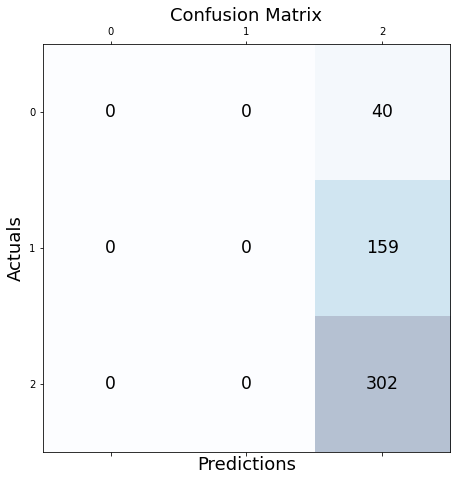

In [29]:
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"
rcParams['figure.figsize'] = 10,5
conf_matrix=confusion_matrix(y_test,predictions)

# Printing confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center',size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [30]:
f1_S=f1_score(y_test, predictions, average='micro')
acc_score = accuracy_score(y_test, predictions)
pre_score = precision_score(y_test, predictions, average='micro')
rec_score = recall_score(y_test, predictions, average='micro')
print('Accuracy_score : ', acc_score)
print('Precision_score : ', pre_score)
print('Recall_score : ', rec_score)
print('F1 Score : ' ,f1_S)
print("-"*60)
cr = classification_report(y_test, predictions)
print(cr)

Accuracy_score :  0.6027944111776448
Precision_score :  0.6027944111776448
Recall_score :  0.6027944111776448
F1 Score :  0.6027944111776448
------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        40
           0       0.00      0.00      0.00       159
           1       0.60      1.00      0.75       302

    accuracy                           0.60       501
   macro avg       0.20      0.33      0.25       501
weighted avg       0.36      0.60      0.45       501



C:\Users\HAMMAD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HAMMAD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HAMMAD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from flask import Flask, redirect, url_for,render_template
import numpy as np

app = Flask(__name__)
@app.route("/")

def hello():
    y="Press to Start Recording"
    return render_template("addyourhtml.html",p=y)
@app.route("/home/")

def home():
    x,y,n=p()
    return render_template("addyouhtml.html",p=y)
print(np)

@app.route("/details/")
def dets():
    x,y,n=p()
    delete()
    return render_template("addyourhtml.html", pre=x, name=n)

if __name__ == "__main__":
    app.run()


<module 'numpy' from 'C:\\Users\\HAMMAD\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


C:\Users\HAMMAD\anaconda3\lib\site-packages\flask\json\__init__.py:31: DeprecationWarning: Importing 'itsdangerous.json' is deprecated and will be removed in ItsDangerous 2.1. Use Python's 'json' module instead.
  _slash_escape = "\\/" not in _json.dumps("/")
C:\Users\HAMMAD\anaconda3\lib\site-packages\flask\json\__init__.py:61: DeprecationWarning: Importing 'itsdangerous.json' is deprecated and will be removed in ItsDangerous 2.1. Use Python's 'json' module instead.
  class JSONEncoder(_json.JSONEncoder):
C:\Users\HAMMAD\anaconda3\lib\site-packages\flask\json\__init__.py:103: DeprecationWarning: Importing 'itsdangerous.json' is deprecated and will be removed in ItsDangerous 2.1. Use Python's 'json' module instead.
  class JSONDecoder(_json.JSONDecoder):
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
